#Data Exploration-colab 2

link to the colab
https://colab.research.google.com/drive/1Npu6iR3X0U5bkurTj8O4BbgVof40vwtf

This colab will build and expand upon the work done in the data cleaning one

The goal of this colab is to, explore different part of the data, and try to gain some insight into what the data actually says.

##Preparation
Before we start to explore the data we need to both get the correct files loaded into the colab, and to the relevant packages that we know we are going to be using.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
!wget https://www.dropbox.com/s/s8nl55go4o8powf/globalterrorismdb_0718dist.csv.zip
!unzip globalterrorismdb_0718dist.csv.zip
!wget https://www.dropbox.com/s/jchj5huazph1htx/out_dataframe-8.csv?dl=0 #with outliers

--2019-09-26 15:24:49--  https://www.dropbox.com/s/s8nl55go4o8powf/globalterrorismdb_0718dist.csv.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s8nl55go4o8powf/globalterrorismdb_0718dist.csv.zip [following]
--2019-09-26 15:24:50--  https://www.dropbox.com/s/raw/s8nl55go4o8powf/globalterrorismdb_0718dist.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc793e2c6f5fbbf7b37e91f63ff9.dl.dropboxusercontent.com/cd/0/inline/ApTzjJUehdtFbe3-go5qXIm0Ej50mq7BTZWZ-ehD4Ryfi9AeZJpNeU4IPbZrwK5V3fuk5sRpwccJf8fQSNypqn0leIUU5Dh-c8B0K4tyu04hrmDA53bI-IGhXMuju8mTjyI/file# [following]
--2019-09-26 15:24:50--  https://uc793e2c6f5fbbf7b37e91f63ff9.dl.dropboxusercontent.com/cd/0/inline/ApTzjJUehdtFbe3-go5qXIm0Ej50mq7BTZWZ-ehD4Ryfi9Ae

In [0]:
df_org=pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", usecols=['iyear','imonth','iday','extended','resolution','country_txt','region_txt','provstate','success','suicide','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','targtype2_txt','targtype3_txt','natlty1_txt','gname','claimed','weaptype1_txt','weaptype2_txt','weaptype3_txt','nkill','nwound','property','crit1','crit2','crit3','individual','vicinity','nkillter'])
df=pd.read_csv('out_dataframe-8.csv?dl=0', encoding="ISO-8859-1", index_col='Unnamed: 0')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,31,33,90) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The reason we also load the original dataset is to do data exploration on some of the variabels before we turn them in to dummies. 
So here we make a dataset with the original features instead of the dummies.

In [0]:
df_nodum1 = df.loc[:,'timestamp':'crit3']
df_nodum2 = df_org.loc[:,['attacktype1_txt','targtype1_txt','weaptype1_txt']]
df_nodum = pd.merge(df_nodum1, df_nodum2, how='left', left_index=True, right_index=True)

# Exploration
Trough the exploration of the data we want to see, if there is any correlation between cosen features, and get some general looks into the data.

### Correlation between the features
To gain insight into whether or not there is any correlation in the data, we run the .corr function.

This is only used on the data not containing the dummies, as the inclusion of them makes the visualisation less readable, as illustated below.

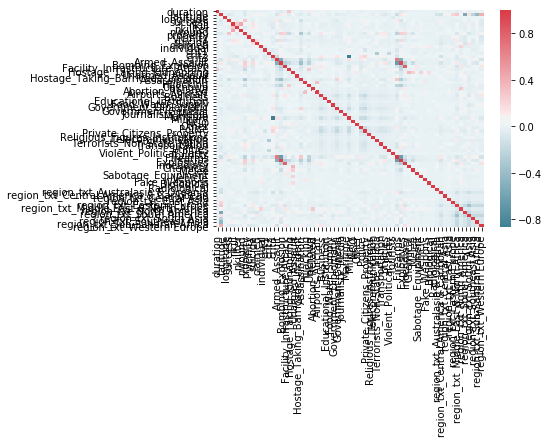

In [0]:
#As you can see, this plot makes the data almost unreadable and factors in to many dummies that do not correlate with anything. 
corr = df.loc[:,'timestamp':'region_txt_Western Europe'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

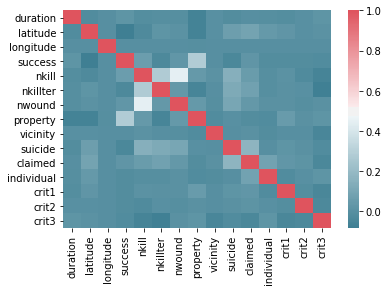

In [0]:
#Here the dummies are filtered out and the visualisation becomes readable.
corr = df_nodum1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True),center=0.5)

It can be seen above, that there aren't any strong correlations in the data, but that there are some like nkill and kwound.

### Distribution of nkill and nwound
looking at the distribution of wounded or killed is intresting, since a lot of terrorist attacks appear to not inflict that many casualties.

The two following plots have been limeted to being between 0 and 100, this is done, since a lot of attack don't have wounded/killed, and a few have so many, that it would skew the visualisation unnecessarily.

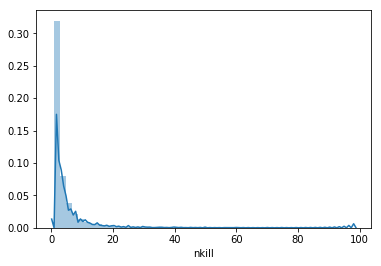

In [0]:
#The distribution of killed in tne attacks
killed=df[(df['nkill']>0)&(df['nkill']<100)]
sns.distplot(killed['nkill'])

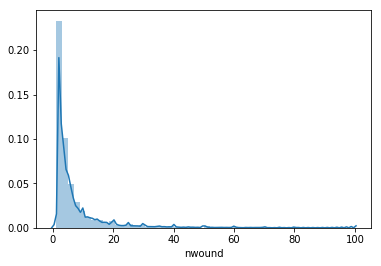

In [0]:
#The distribution of the wounded
wounded=df[(df['nwound']>0)&(df['nwound']<100)]
sns.distplot(wounded['nwound'])

### Top 10 countries with most people killed
It's also intresting to see which countries have the most killed from attacks. 

The choice of the barplot here, is made since it gives a good simple overview og the "top 10" 

To little surprise the top 10 is filled almost exclusively with war torn countries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

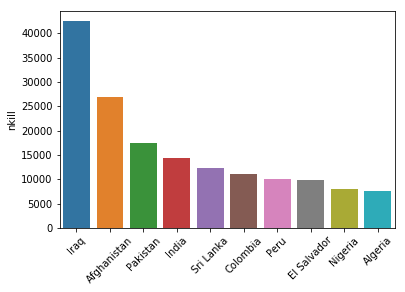

In [0]:

top_10=df.groupby(['country_txt']).sum().sort_values('nkill', ascending=False).head(10)
sns.barplot(x=top_10.index.values ,y='nkill',data=top_10)
plt.xticks(rotation=45)

### Worst terror groups
At the other end of the spectrum it is intresting to see if the groups that rack up the most kills, are also the groups that are known to operate in the same countries or regions as the countries that have the most killed.

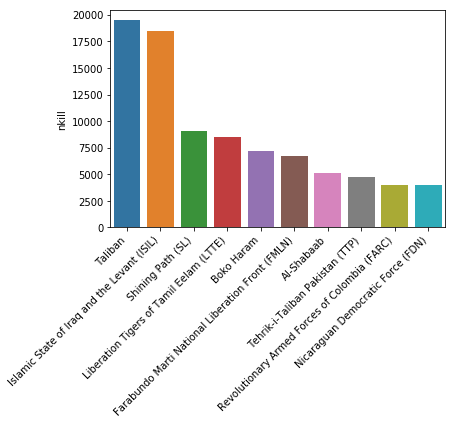

In [0]:
top_10=df.groupby(['gname']).sum().sort_values('nkill', ascending=False).head(11)
top_10.drop('Unknown',inplace=True) #We are not interested in all the 'Unknown'
Plot=sns.barplot(x=top_10.index.values ,y='nkill',data=top_10)
plt.xticks(rotation=45)
Plot.set_xticklabels(Plot.get_xticklabels(), rotation=45, horizontalalignment='right')
print(' ') #Just so it doesnt plot some wiered stuff before

By comparing the terror groups and the contries in the "top 10" there is a clear connection.

### 5 most deadly attacks

Intrestingly engough it does not appear, as if the deadliest attacks took place in the top 10 countries. Only 1 attack out of the 5 the most deadly, appear to be in the top 10 deadly countries.

In [0]:
df.sort_values('nkill',ascending=False).head(5)

,timestamp,duration,country_txt,latitude,longitude,success,nkill,nkillter,nwound,property,vicinity,suicide,claimed,gname,individual,crit1,crit2,crit3,Armed_Assault,Bombing_Explosion,Facility_Infrastructure_Attack,Hostage_Taking_Kidnapping,Unarmed_Assault,Hostage_Taking_Barricade_Incident,Assassination,Hijacking,Unknown,Abortion_Related,Airports_Aircraft,Business,Educational_Institution,Food_Water_Supply,Government_Diplomatic,Government_General,Journalists_Media,Maritime,Military,NGO,Other,Police,Private_Citizens_Property,Religious_Figures_Institutions,Telecommunication,Terrorists_Non-State_Militia,Transportation,Utilities,Violent_Political_Party,Tourists,Firearms,Explosives,Incendiary,Chemical,Melee,Sabotage_Equipment,Vehicle,Fake_Weapons,Biological,Radiological,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe
73126,2001-09-11,0,United States,40.697132,-73.931351,1,1384.0,5.0,8190.0,1.0,0.0,1,1.0,Al-Qaida,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
55934,1994-04-13,0,Rwanda,-1.932787,30.332456,1,1180.0,0.0,0.0,1.0,0.0,0,0.0,Hutu extremists,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
133225,2014-06-10,0,Iraq,36.407394,42.964626,1,670.0,0.0,0.0,1.0,0.0,0,1.0,Islamic State of Iraq and the Levant (ISIL),0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
179671,2017-10-14,0,Somalia,2.059819,45.326115,1,588.0,1.0,316.0,1.0,0.0,1,1.0,Al-Shabaab,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76347,2004-03-21,0,Nepal,27.959441,84.895897,1,518.0,500.0,216.0,1.0,0.0,0,0.0,Communist Party of Nepal- Maoist (CPN-M),0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### There were 29 attacks in Denmark
It is interesting to see that even in Denmark 29 terror attacks are recorded in this dataset.

In [0]:
print(df[df['country_txt'] == 'Denmark'].shape[0])

29


### Looking at attacktype
Trough this quick look at the preferred method of attack, it becomes clear, that terrorist through the last 50 years, prefer to use forms of attack that sow the most chaos and panic. 
In the second line of code we gain an insight into results of the different of attacks.

In [0]:
df_nodum.attacktype1_txt.value_counts()

Bombing/Explosion                      55836
Armed Assault                          28878
Assassination                          14863
Facility/Infrastructure Attack          7294
Unknown                                 4414
Hostage Taking (Kidnapping)             4058
Unarmed Assault                          721
Hostage Taking (Barricade Incident)      651
Hijacking                                477
Name: attacktype1_txt, dtype: int64

In [0]:
#By looking at the mean of the attack types in the different columns we gain insight into the serverity of the different types
df_nodum.drop(columns=['country_txt','latitude','longitude']).groupby(by=['attacktype1_txt']).mean()

,duration,success,nkill,nkillter,nwound,property,vicinity,suicide,claimed,individual,crit1,crit2,crit3
attacktype1_txt,,,,,,,,,,,,,
Armed Assault,0.011566,0.937530,3.632419,0.412909,2.011739,0.515340,0.089722,0.001073,0.093670,0.005575,0.981058,0.990581,0.775815
Assassination,0.007065,0.747763,1.299132,0.034919,0.756442,0.174796,0.043598,0.012514,0.059140,0.002220,0.967705,0.985265,0.942609
Bombing/Explosion,0.001540,0.845745,1.823035,0.203632,4.595386,0.689573,0.072910,0.070761,0.112132,0.002060,0.996275,0.996758,0.894978
Facility/Infrastructure Attack,0.004524,0.942418,0.315191,0.032218,0.417741,0.953112,0.058267,0.000137,0.116808,0.010831,0.989443,0.996710,0.983685
Hijacking,0.335430,0.855346,4.534591,0.140461,18.379455,0.312369,0.098532,0.016771,0.094340,0.037736,0.989518,1.000000,0.985325
Hostage Taking (Barricade Incident),0.251920,0.992320,4.187404,0.385561,4.522273,0.760369,0.033794,0.058372,0.167435,0.024578,0.981567,0.947773,0.980031
Hostage Taking (Kidnapping),3.397979,0.949975,1.761705,0.049285,0.494579,0.088960,0.084771,0.001232,0.123213,0.002218,0.967225,0.994579,0.963775
Unarmed Assault,0.012483,0.866852,0.872399,0.049931,18.110957,0.368932,0.069348,0.000000,0.117892,0.056865,0.976422,0.990291,0.919556
Unknown,0.005211,0.806751,4.255097,1.305845,2.369053,0.426597,0.078614,0.000453,0.115541,0.000227,0.997055,0.982782,0.732216


###Regions
Due to the geo political enviroment that terrorist attacks exist in, we regonise that the classical traits of a terrorist attack might vary a lot between the world regions.

So by just choosing one world region we expect to see a higher correlation between the variables, or maybe just a different picture.

As showen in the 5 most deadly attacks, there are som extreame values in nkilled, and we have found that is also true in nwound and nkillter. So we have decided to study Western Europe, as it seem to be without so many extreme values.

So first we look at the correlation tabel again.

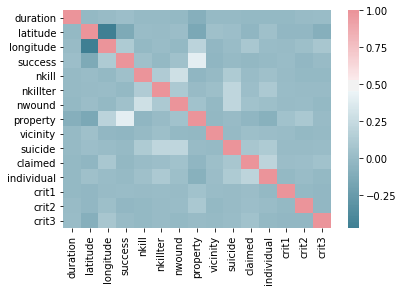

In [16]:
df_west= df[ df['region_txt_Western Europe'] == 1 ]
df_west_nodum1 = df_west.loc[:,'timestamp':'crit3'] #Rand now removing the dummies for this data as well
corr = df_west_nodum1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap=sns.diverging_palette(220, 10, as_cmap=True),center=0.5)

So just looking at Western Europe did not change too much on the pattern of the heatmap.